<a id="section_toc"></a> 
## Tabla de Contenidos

 
* Data cleaning

[price](#price)

[missing](#missing)

[price_usd_per_m2 - target](#section_price_1000)

[surface_covered_in_m2](#section_surface)

[room](#section_room)

[expenses](#section_exp2)

[floor](#section_floor)

* Relaciones entre variables

[descriptivas](#section_des)

[correlacion](#section_corr)


* Nuevas columnas/variables creadas:

sobre el data original:

[sup_uncovered](#section_uncovered)

[barrios](#section_barrios)

[property_type](#section_property)

[pileta y cochera](#section_pileta)

sobre data externa: 

[subte/bus/train](#section_externa)

* Regresiones lineales

[regresiones](#section_regres)


In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import requests
sns.set() #par que es?
import missingno as msno

In [2]:
df = pd.read_csv("../data/properati.csv", index_col=0)
df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [3]:
caba = df.loc[df.state_name == 'Capital Federal', :]
caba.shape

(32316, 25)

In [4]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   32316 non-null  object 
 1   property_type               32316 non-null  object 
 2   place_name                  32316 non-null  object 
 3   place_with_parent_names     32316 non-null  object 
 4   country_name                32316 non-null  object 
 5   state_name                  32316 non-null  object 
 6   geonames_id                 31030 non-null  float64
 7   lat-lon                     23770 non-null  object 
 8   lat                         23770 non-null  float64
 9   lon                         23770 non-null  float64
 10  price                       29018 non-null  float64
 11  currency                    29018 non-null  object 
 12  price_aprox_local_currency  29018 non-null  float64
 13  price_aprox_usd             29

<a id="price"></a> 
## Price variables

[volver a TOC](#section_toc)

price_aprox_usd (29018 non-null) tiene menos missings que price_usd_per_m2 (23434 non-null), e igual a  price (29018 non-null).

In [5]:
caba['xr'] = caba['price_aprox_local_currency'] / caba['price_aprox_usd']
caba['xr']

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         17.6445
2         17.6445
3         17.6445
7         17.6445
8         17.6445
           ...   
121160    17.6445
121209    17.6445
121215    17.6445
121217    17.6445
121219    17.6445
Name: xr, Length: 32316, dtype: float64

El tipo de cambio fue 17.64

In [6]:
caba['currency'].value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

In [7]:
dif = caba['price'] - caba['price_aprox_usd']
dif

0         0.0
2         0.0
3         0.0
7         0.0
8         0.0
         ... 
121160    0.0
121209    0.0
121215    0.0
121217    0.0
121219    0.0
Length: 32316, dtype: float64

La diferencia entre price y price_aprox_usd, son los 1190 que estan en currency pesos.

In [8]:
dif.value_counts()

0.00           27826
47083357.64        6
1812319.35         5
1973448.69         4
1660443.21         4
               ...  
1051428.40         1
1982224.28         1
1624118.48         1
2129835.81         1
2274601.42         1
Length: 978, dtype: int64

In [9]:
sup = caba['surface_total_in_m2'] - caba['surface_covered_in_m2']

In [10]:
sup.value_counts() #varias coincidencias entre covered y total

0.0       6569
4.0       1947
5.0       1910
3.0       1856
6.0       1270
          ... 
146.0        1
154.0        1
431.0        1
161.0        1
1031.0       1
Length: 488, dtype: int64

In [11]:
caba.surface_total_in_m2.isnull().sum()

5879

In [12]:
# #Reemplazamos los missing de sup total con covered.
# caba['surface_total_in_m2'] = caba.surface_total_in_m2.fillna(caba['surface_covered_in_m2'])
# #Try using .loc[row_indexer,col_indexer] = value instead
# caba.surface_total_in_m2.isnull().sum() 

Calculo de variable dependiente alternativa

In [13]:
caba['p_usd_m2'] = round(caba['price_aprox_usd']/caba['surface_total_in_m2'],0)


/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   32316 non-null  object 
 1   property_type               32316 non-null  object 
 2   place_name                  32316 non-null  object 
 3   place_with_parent_names     32316 non-null  object 
 4   country_name                32316 non-null  object 
 5   state_name                  32316 non-null  object 
 6   geonames_id                 31030 non-null  float64
 7   lat-lon                     23770 non-null  object 
 8   lat                         23770 non-null  float64
 9   lon                         23770 non-null  float64
 10  price                       29018 non-null  float64
 11  currency                    29018 non-null  object 
 12  price_aprox_local_currency  29018 non-null  float64
 13  price_aprox_usd             29

In [15]:
d = caba['p_usd_m2'] - caba['price_usd_per_m2']
d.value_counts() 
#son casi iguales solo que price_usd_per_m2 tiene 23434 non-null, y p_usd_m2 28454 non-null

 0.000000    3237
-0.333333     579
 0.333333     239
-0.500000     225
 0.285714     199
             ... 
-0.467468       1
 0.342466       1
-0.339806       1
 0.029412       1
 0.070175       1
Length: 5435, dtype: int64

In [16]:
caba.drop(caba.columns[[0, 3, 4, 5, 6, 7, 10, 11, 12, 17, 24, 25]], axis=1, inplace=True)
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          32316 non-null  object 
 1   place_name             32316 non-null  object 
 2   lat                    23770 non-null  float64
 3   lon                    23770 non-null  float64
 4   price_aprox_usd        29018 non-null  float64
 5   surface_total_in_m2    26437 non-null  float64
 6   surface_covered_in_m2  29977 non-null  float64
 7   price_usd_per_m2       23434 non-null  float64
 8   floor                  3009 non-null   float64
 9   rooms                  15325 non-null  float64
 10  expenses               6592 non-null   float64
 11  properati_url          32316 non-null  object 
 12  description            32316 non-null  object 
 13  title                  32316 non-null  object 
 14  p_usd_m2               23447 non-null  float64
dtypes

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Muchas variables con muchos missing.



<a id="missing"></a> 
## Missing values

[volver a TOC](#section_toc)


In [17]:
caba.shape

(32316, 15)

In [18]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,8546,0.264451
3,lon,8546,0.264451
4,price_aprox_usd,3298,0.102055
5,surface_total_in_m2,5879,0.181922
6,surface_covered_in_m2,2339,0.072379
7,price_usd_per_m2,8882,0.274848
8,floor,29307,0.906888
9,rooms,16991,0.525777


In [19]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Visualizaciones de missing

<AxesSubplot:>

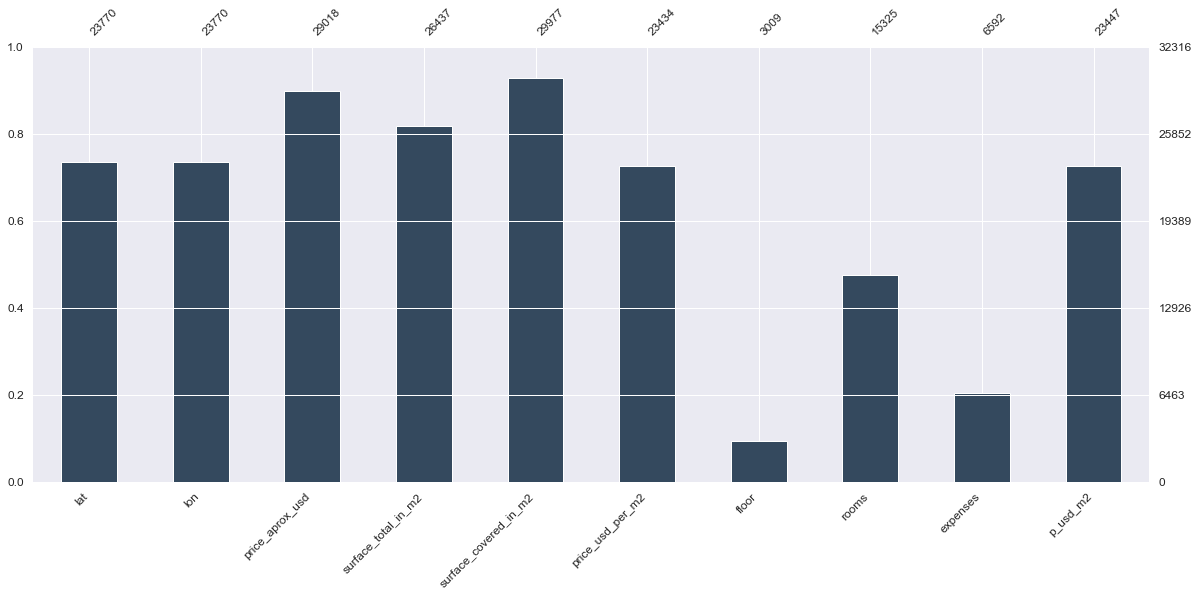

In [20]:
missingValueColumns = caba.columns[caba.isnull().any()].tolist()
msno.bar(caba[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

<AxesSubplot:>

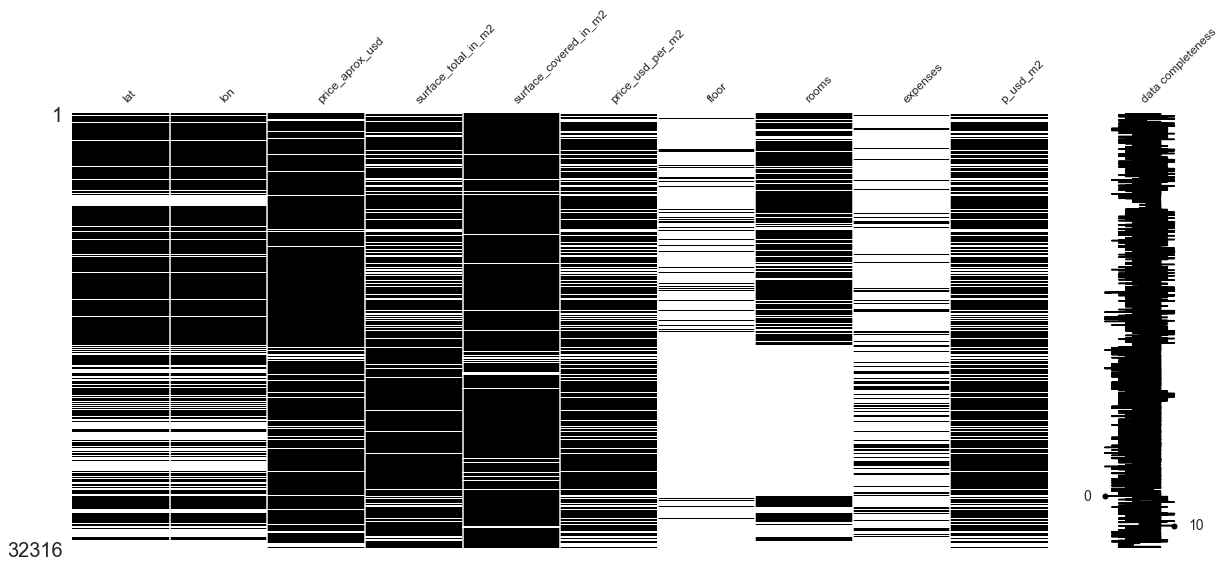

In [21]:
msno.matrix(caba[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

<a id="section_price_1000"></a> 
## price_usd_per_m2 / p_usd_m2
* missing
* outliers

[volver a TOC](#section_toc)

**Missing**

Consideramos que imputar los valores missing de la variable target price_usd_per_m2 podria afectar nuestro data set y luego afectar nuestro futuro modelo de prediccion. Por lo que optamos por eliminarlos.

**Outliers**

Analizamos los graficos. Evaluamos y aplicamos un limite por juicio propio o limite por busines decision de 50.000 USD/m2.

In [22]:
caba = caba.dropna(subset=["price_usd_per_m2"]) #Droping the missing values 

In [23]:
#caba = caba.dropna(subset=["p_usd_m2"]) #Droping the missing values #p_usd_m2

<AxesSubplot:title={'center':'Price in USD per m2'}, xlabel='price_usd_per_m2'>

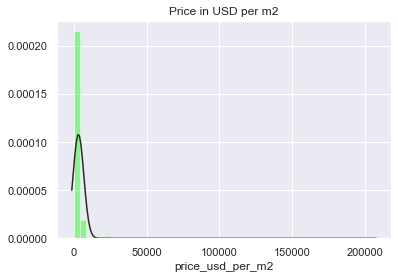

In [24]:
import scipy.stats as st 

y = caba["price_usd_per_m2"]
plt.figure(2); plt.title('Price in USD per m2')
sns.distplot(y, kde=False, fit=st.norm, color = 'lime')

<AxesSubplot:xlabel='price_usd_per_m2'>

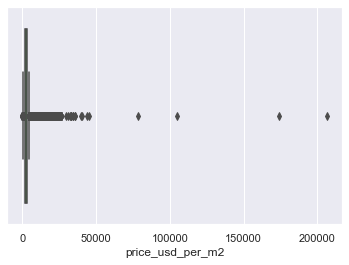

In [25]:
sns.boxplot(y , color='lime')

<AxesSubplot:title={'center':'Distribucion de precio por m2 en USD'}, xlabel='price_usd_per_m2'>

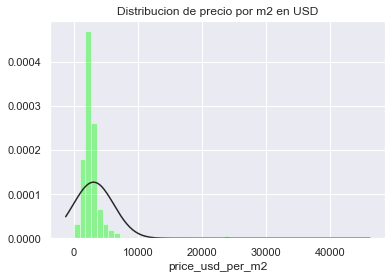

In [26]:
y = caba[caba['price_usd_per_m2']<= 50000]['price_usd_per_m2']
plt.figure(2); plt.title('Distribucion de precio por m2 en USD')
sns.distplot(y, kde=False, fit=st.norm, color = "lime")

<AxesSubplot:xlabel='price_usd_per_m2'>

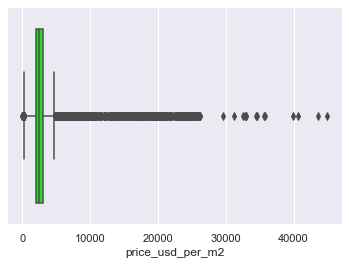

In [27]:
sns.boxplot(y , color='lime')

In [28]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 121219
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          23434 non-null  object 
 1   place_name             23434 non-null  object 
 2   lat                    17217 non-null  float64
 3   lon                    17217 non-null  float64
 4   price_aprox_usd        23434 non-null  float64
 5   surface_total_in_m2    23434 non-null  float64
 6   surface_covered_in_m2  22319 non-null  float64
 7   price_usd_per_m2       23434 non-null  float64
 8   floor                  1405 non-null   float64
 9   rooms                  10554 non-null  float64
 10  expenses               5929 non-null   float64
 11  properati_url          23434 non-null  object 
 12  description            23434 non-null  object 
 13  title                  23434 non-null  object 
 14  p_usd_m2               23434 non-null  float64
dtypes

In [29]:
caba.drop(caba.columns[[14]], axis=1, inplace=True)
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 121219
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          23434 non-null  object 
 1   place_name             23434 non-null  object 
 2   lat                    17217 non-null  float64
 3   lon                    17217 non-null  float64
 4   price_aprox_usd        23434 non-null  float64
 5   surface_total_in_m2    23434 non-null  float64
 6   surface_covered_in_m2  22319 non-null  float64
 7   price_usd_per_m2       23434 non-null  float64
 8   floor                  1405 non-null   float64
 9   rooms                  10554 non-null  float64
 10  expenses               5929 non-null   float64
 11  properati_url          23434 non-null  object 
 12  description            23434 non-null  object 
 13  title                  23434 non-null  object 
dtypes: float64(9), object(5)
memory usage: 2.7+ MB


In [30]:
caba.price_usd_per_m2.describe()

count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [31]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6217,0.265298
3,lon,6217,0.265298
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,1115,0.047580
7,price_usd_per_m2,0,0.000000
8,floor,22029,0.940044
9,rooms,12880,0.549629


<a id="section_surface"></a> 
## surface_covered_in_m2

* outliers (IQR, businees)
* valores faltantes

[volver a TOC](#section_toc)

In [32]:
caba.surface_covered_in_m2.isnull().sum()

1115

Reemplazamos los missing de sup covered con total.

In [33]:
caba['surface_covered_in_m2'] = caba.surface_covered_in_m2.fillna(caba['surface_total_in_m2'])

In [34]:
caba.surface_covered_in_m2.isnull().sum()

0

count     23434.000000
mean         99.868567
std        1317.990150
min           0.000000
25%          38.000000
50%          55.000000
75%          96.000000
max      200000.000000
Name: surface_covered_in_m2, dtype: float64


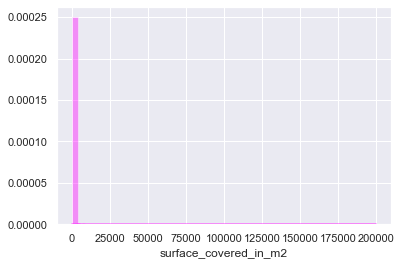

In [35]:
print(caba.surface_covered_in_m2.describe()) #Observamos los valores de surface covered
sns.distplot(caba['surface_covered_in_m2'],  color = 'fuchsia')
plt.show()

<AxesSubplot:xlabel='surface_covered_in_m2'>

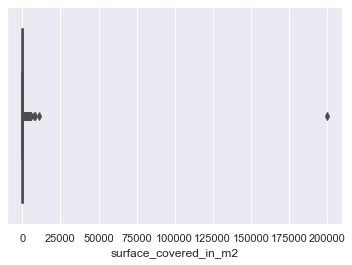

In [36]:
sns.boxplot(caba['surface_covered_in_m2'],  color = 'fuchsia')

count    23387.000000
mean        91.498311
std        178.285672
min         18.000000
25%         38.000000
50%         55.000000
75%         96.000000
max      10958.000000
Name: surface_covered_in_m2, dtype: float64


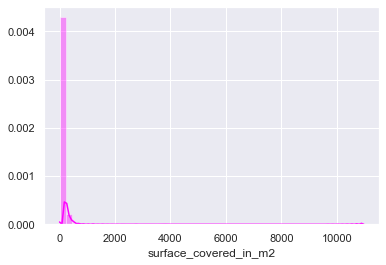

<AxesSubplot:xlabel='surface_covered_in_m2'>

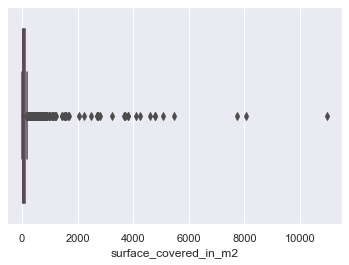

In [37]:
caba = caba[caba['surface_covered_in_m2']<= 25000]
caba = caba[caba['surface_covered_in_m2']>= 18] #como minimo un departamente tiene que tener 18 m cuadrados

print(caba.surface_covered_in_m2.describe()) #Observamos los valores de surface covered
sns.distplot(caba['surface_covered_in_m2'],  color = 'fuchsia')
plt.show()

sns.boxplot(caba['surface_covered_in_m2'],  color = 'fuchsia')

In [38]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6212,0.265618
3,lon,6212,0.265618
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,21989,0.940223
9,rooms,12848,0.549365


<a id="section_room"></a> 
## room

[volver a TOC](#section_toc)

In [39]:
#REGEX

import re

pattern_ambientes = r'(?P<amb>\d+)(\s)(\b(ambientes|ambiente|amb|cuarto|cuartos|habitacion|habitaciones|dormitorio|dormitorios|dorm|hab)\b)'
pattern_ambientes_regex = re.compile(pattern_ambientes)
description_series = caba.title.astype(str)
resultado_ambientes = description_series.apply(lambda x: x if x is np.nan else pattern_ambientes_regex.search(x))
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('amb'))

In [40]:
ambientes_match.value_counts()

3     1137
2     1047
4      651
1      425
5      184
6       46
7       19
8       13
9        4
10       2
14       2
15       1
11       1
20       1
27       1
Name: title, dtype: int64

In [41]:
caba['rooms'] = caba['rooms'].fillna(ambientes_match)

In [42]:
caba.rooms.isnull().value_counts()

False    11990
True     11397
Name: rooms, dtype: int64

Se redujeron los missing de romms gracias a regex en title, si corremos el regex en description y hacemos value counts salen cantidad de cuartos raros.

Asimismo, los otros missing de la variable rooms que podemos reemplazar:

con la moda o 
con una proporcion 0.55 y 0.45 de los dos mayores valores. 

Optamos por la segunda opcion.

Pero antes tenemso que convertir a rooms es int.

In [43]:
caba.rooms.value_counts() #Hay que hacerla int

1.0     2817
3.0     2454
2.0     2448
4.0     1793
5.0      672
3        449
2        448
4        287
6.0      197
1        120
7.0       97
5         93
8.0       31
6         30
7         10
10.0       8
9.0        8
8          8
12.0       8
11.0       3
13.0       1
14.0       1
10         1
27         1
20         1
14         1
11         1
15         1
15.0       1
Name: rooms, dtype: int64

In [44]:
caba['rooms'] = pd.to_numeric(caba.rooms)

In [45]:
caba.rooms.value_counts() #int La mayoeia son de 1 y 3 cuartos

1.0     2937
3.0     2903
2.0     2896
4.0     2080
5.0      765
6.0      227
7.0      107
8.0       39
10.0       9
12.0       8
9.0        8
11.0       4
15.0       2
14.0       2
20.0       1
27.0       1
13.0       1
Name: rooms, dtype: int64

In [46]:
def count_plotter(data, label, labelsize=12):    
    sns.set(rc={"figure.figsize": (10, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(data)
    data_count.set_title('Histograma de ' + label + '\n', fontsize=16)

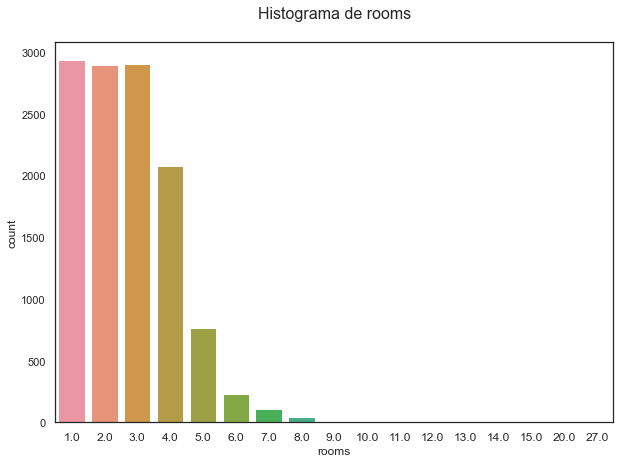

In [47]:
count_plotter(caba.rooms, "rooms")

In [48]:
#Cantidad de nulos, 1  3  rooms:
cant_car_null = caba.rooms.isnull().sum()
print("# nulos en rooms: ",cant_car_null)

car_three_mask = caba.rooms == 1
cant_car_3 = car_three_mask.sum()
print("# 3 en rooms: ",cant_car_3)

car_four_mask = caba.rooms == 3
cant_car_4 = car_four_mask.sum()
print("# 4 en rooms: ",cant_car_4)

# nulos en rooms:  11397
# 3 en rooms:  2937
# 4 en rooms:  2903


In [49]:
# los registros que son null en Car:
data_car_null_mask = caba.rooms.isnull()
data_car_null = caba.loc[data_car_null_mask, :]
print(data_car_null.shape[0])


# una muestra del 45% de los registros calculados en el paso anterior:
data_car_null_mask_sample_1 = data_car_null.sample(frac = 0.45)


# los índices de ese 45%
data_car_null_ones_index = data_car_null_mask_sample_1.index
print(len(data_car_null_ones_index))


# los que van a ser rellenados con valor 2 son todos los que no fueron seleccionados en el paso anterior:
data_car_null_twos_index = data_car_null.index.difference(data_car_null_ones_index)
print(len(data_car_null_twos_index))

11397
5129
6268


In [50]:
caba.loc[data_car_null_ones_index, "rooms"] = 3
caba.loc[data_car_null_twos_index, "rooms"] = 1

In [51]:
cant_car_null = caba.rooms.isnull().sum()
print(cant_car_null)

car_one_mask = caba.rooms == 4
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

car_two_mask = caba.rooms == 3
cant_car_2 = car_two_mask.sum()
print(cant_car_2)

0
2080
8032


In [52]:
caba.rooms.value_counts() 

1.0     9205
3.0     8032
2.0     2896
4.0     2080
5.0      765
6.0      227
7.0      107
8.0       39
10.0       9
12.0       8
9.0        8
11.0       4
15.0       2
14.0       2
20.0       1
27.0       1
13.0       1
Name: rooms, dtype: int64

In [53]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6212,0.265618
3,lon,6212,0.265618
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,21989,0.940223
9,rooms,0,0.000000


<a id="section_exp2"></a> 
## expenses

[volver a TOC](#section_toc)

In [54]:
#REGEX

pattern_exp = r'(\b(expensas|expensa)\b)(\s)($)(?P<exp>\d+)'
pattern_exp_regex = re.compile(pattern_exp)
description_series = caba.properati_url.astype(str)
resultado_exp = description_series.apply(lambda x: x if x is np.nan else pattern_exp_regex.search(x))
exp_match = resultado_exp.apply(lambda x: x if x is None else x.group('exp'))

In [55]:
exp_match.value_counts()

Series([], Name: properati_url, dtype: int64)

Probamos regex, sin resultados.

Reemplazamos por media por cantidad de cuartos y barrio.

In [56]:
caba.groupby(['rooms'])['expenses'].median() #parece mas estable que mean

rooms
1.0     1800.0
2.0     1500.0
3.0     2150.0
4.0     4000.0
5.0     8600.0
6.0     4000.0
7.0     4800.0
8.0     7000.0
9.0        NaN
10.0       NaN
11.0    1700.0
12.0       NaN
13.0       NaN
14.0       NaN
15.0       NaN
20.0       NaN
27.0       NaN
Name: expenses, dtype: float64

In [57]:
caba.groupby(['rooms'])['expenses'].mean()

rooms
1.0      3093.199031
2.0     32606.516179
3.0      3271.461571
4.0      5206.226496
5.0     10745.976744
6.0     10326.086957
7.0      6392.923077
8.0      7000.000000
9.0              NaN
10.0             NaN
11.0     1700.000000
12.0             NaN
13.0             NaN
14.0             NaN
15.0             NaN
20.0             NaN
27.0             NaN
Name: expenses, dtype: float64

In [58]:
caba.groupby(['place_name','rooms'])['expenses'].median()

place_name        rooms
Abasto            1.0       1000.0
                  2.0       1390.0
                  3.0       2050.0
                  4.0       2100.0
                  5.0        500.0
                            ...   
Villa del Parque  3.0       1600.0
                  4.0       2500.0
                  5.0          NaN
                  6.0          NaN
                  7.0      10000.0
Name: expenses, Length: 413, dtype: float64

Decidimos reemplazar los missing con la **mediana** de expensas segun la cantidad de cuartos del apartamento.  

In [59]:
caba['expenses'].fillna(caba.groupby(['place_name','rooms'])['expenses'].transform('median'),inplace=True)

In [60]:
#Carlos dijo que lo de arriba no era el mejor procedieminto

In [61]:
print("Missing de la variable expenses: ", caba['expenses'].isnull().sum())

Missing de la variable expenses:  612


In [62]:
caba.expenses.isnull().value_counts()

False    22775
True       612
Name: expenses, dtype: int64

Los pocos missing que quedan los dropeamos porque reemplazar por la media de expensas da algo rarisimo.

In [63]:
caba= caba.dropna(subset=["expenses"]) #dropna

In [64]:
caba.expenses.isnull().value_counts()

False    22775
Name: expenses, dtype: int64

In [65]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6177,0.271218
3,lon,6177,0.271218
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,21384,0.938924
9,rooms,0,0.000000


In [66]:
caba.expenses.value_counts()

1800.0     1789
2000.0     1359
1500.0     1303
1200.0      874
1650.0      809
           ... 
2690.0        1
9950.0        1
2541.0        1
1971.0        1
22527.0       1
Name: expenses, Length: 741, dtype: int64

In [67]:
caba['expenses'] = round(caba['expenses'],0)

count    2.277500e+04
mean     3.633381e+03
std      9.373918e+04
min      1.000000e+00
25%      1.460000e+03
50%      1.850000e+03
75%      2.918000e+03
max      1.000150e+07
Name: expenses, dtype: float64


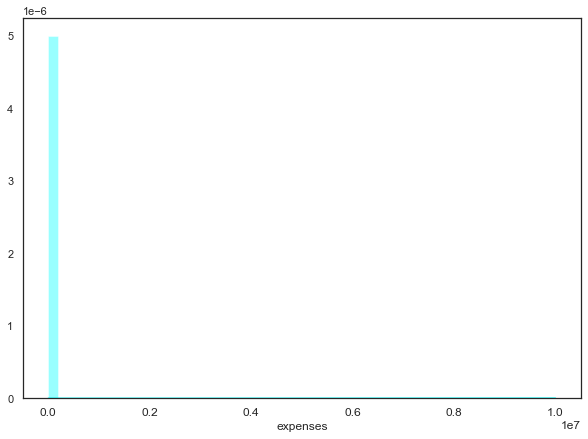

<AxesSubplot:xlabel='expenses'>

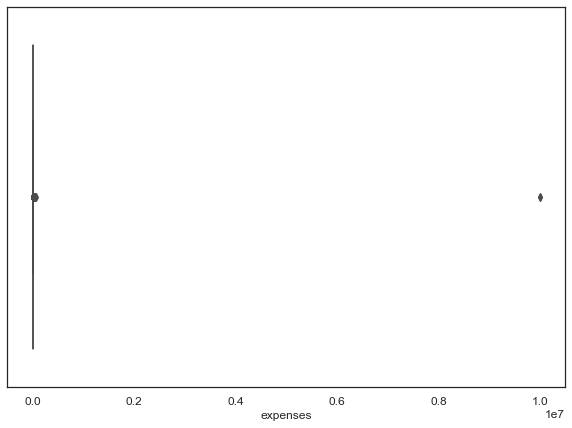

In [68]:
print(caba.expenses.describe()) 
sns.distplot(caba['expenses'],  color = 'aqua') #no entiendo estos graficos
plt.show()

sns.boxplot(caba['expenses'], color = 'aqua')

In [69]:
caba = caba[caba['expenses']<= 60000] #sacamos el outlier

count    22772.000000
mean      2752.382839
std       2804.936420
min          1.000000
25%       1460.000000
50%       1850.000000
75%       2918.000000
max      54240.000000
Name: expenses, dtype: float64


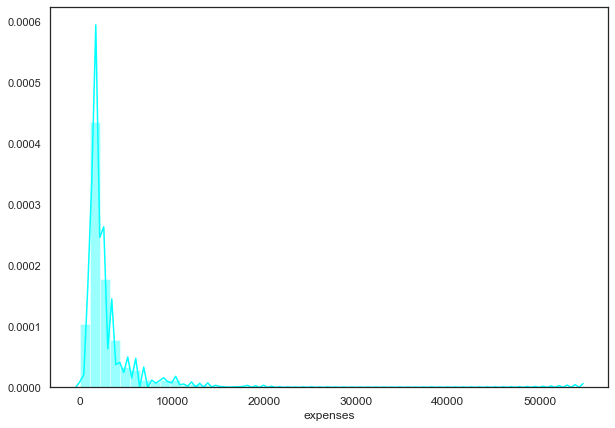

<AxesSubplot:xlabel='expenses'>

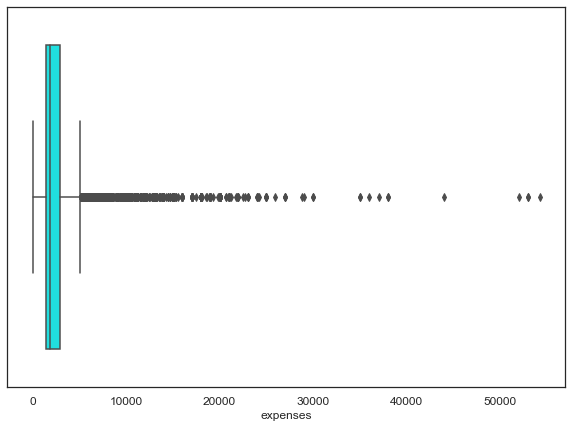

In [70]:
print(caba.expenses.describe()) 
sns.distplot(caba['expenses'],  color = 'aqua') #no entiendo estos graficos
plt.show()

sns.boxplot(caba['expenses'], color = 'aqua')

In [71]:
caba.shape

(22772, 14)

<a id="section_floor"></a> 
## floor

[volver a TOC](#section_toc)

In [72]:
caba.floor.value_counts()

1.0      296
2.0      228
3.0      178
4.0      119
5.0      109
6.0      108
7.0       88
8.0       60
9.0       53
10.0      44
11.0      32
12.0      23
13.0      17
14.0       9
15.0       8
17.0       5
27.0       3
16.0       3
22.0       3
18.0       2
117.0      1
20.0       1
21.0       1
Name: floor, dtype: int64

REGEX

In [73]:


pattern_exp = r'(\b(piso|pisos)\b)(\s)(?P<piso>\d+)'
pattern_exp_regex = re.compile(pattern_exp)
description_series = caba.description.astype(str)
resultado_exp = description_series.apply(lambda x: x if x is np.nan else pattern_exp_regex.search(x))
exp_match = resultado_exp.apply(lambda x: x if x is None else x.group('piso'))


In [74]:
exp_match

0         None
2         None
7         None
8         None
13        None
          ... 
121160       1
121209       1
121215    None
121217    None
121219    None
Name: description, Length: 22772, dtype: object

In [75]:
exp_match.value_counts()

10     93
6      71
9      71
18     67
8      62
1      56
4      54
2      48
13     46
15     44
11     40
14     35
28     29
7      23
3      22
12     17
5      15
29     11
27     11
25      6
46      6
26      5
20      5
33      5
16      5
17      4
24      4
23      3
19      3
22      2
34      2
40      2
45      2
30      1
255     1
36      1
49      1
60      1
31      1
32      1
102     1
54      1
82      1
63      1
35      1
56      1
220     1
52      1
Name: description, dtype: int64

In [76]:
caba['floor'].fillna(exp_match)

0         None
2         None
7         None
8         None
13        None
          ... 
121160       1
121209       1
121215    None
121217    None
121219    None
Name: floor, Length: 22772, dtype: object

In [77]:
caba['floor'].isnull().value_counts()

True     21381
False     1391
Name: floor, dtype: int64

In [78]:
caba['floor'].isnull().sum()

21381

In [79]:
caba.shape

(22772, 14)

In [80]:
caba.floor.value_counts()

1.0      296
2.0      228
3.0      178
4.0      119
5.0      109
6.0      108
7.0       88
8.0       60
9.0       53
10.0      44
11.0      32
12.0      23
13.0      17
14.0       9
15.0       8
17.0       5
27.0       3
16.0       3
22.0       3
18.0       2
117.0      1
20.0       1
21.0       1
Name: floor, dtype: int64

In [81]:
caba = caba[caba['floor']<= 30] #sacamos el outlier y los missing

In [82]:
caba.shape

(1390, 14)

In [83]:
# # caba_floor = caba
# caba_floor['floor']= caba.floor.fillna(1)
# caba_floor.shape
# caba_floor = caba_floor[caba_floor['floor']<= 30] #sacamos el outlier

In [84]:
caba['floor'].isnull().sum()

0

In [85]:
# mode = caba.floor.mode()
# caba = caba.floor.fillna(mode)
caba.floor.value_counts()

1.0     296
2.0     228
3.0     178
4.0     119
5.0     109
6.0     108
7.0      88
8.0      60
9.0      53
10.0     44
11.0     32
12.0     23
13.0     17
14.0      9
15.0      8
17.0      5
22.0      3
27.0      3
16.0      3
18.0      2
20.0      1
21.0      1
Name: floor, dtype: int64

In [86]:
# caba = caba_floor

In [87]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,82,0.058993
3,lon,82,0.058993
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,0,0.000000
9,rooms,0,0.000000


<a id="section_latlon"></a> 
## latlon

[volver a TOC](#section_toc)

In [88]:
caba= caba.dropna(subset=["lat"]) #dropna

In [89]:
caba= caba.dropna(subset=["lon"]) #dropna

In [90]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.0
1,place_name,0,0.0
2,lat,0,0.0
3,lon,0,0.0
4,price_aprox_usd,0,0.0
5,surface_total_in_m2,0,0.0
6,surface_covered_in_m2,0,0.0
7,price_usd_per_m2,0,0.0
8,floor,0,0.0
9,rooms,0,0.0


In [91]:
caba.shape

(1308, 14)

<a id="section_des"></a> 
## descriptivas

[volver a TOC](#section_toc)

In [92]:
plt.style.use('dark_background')

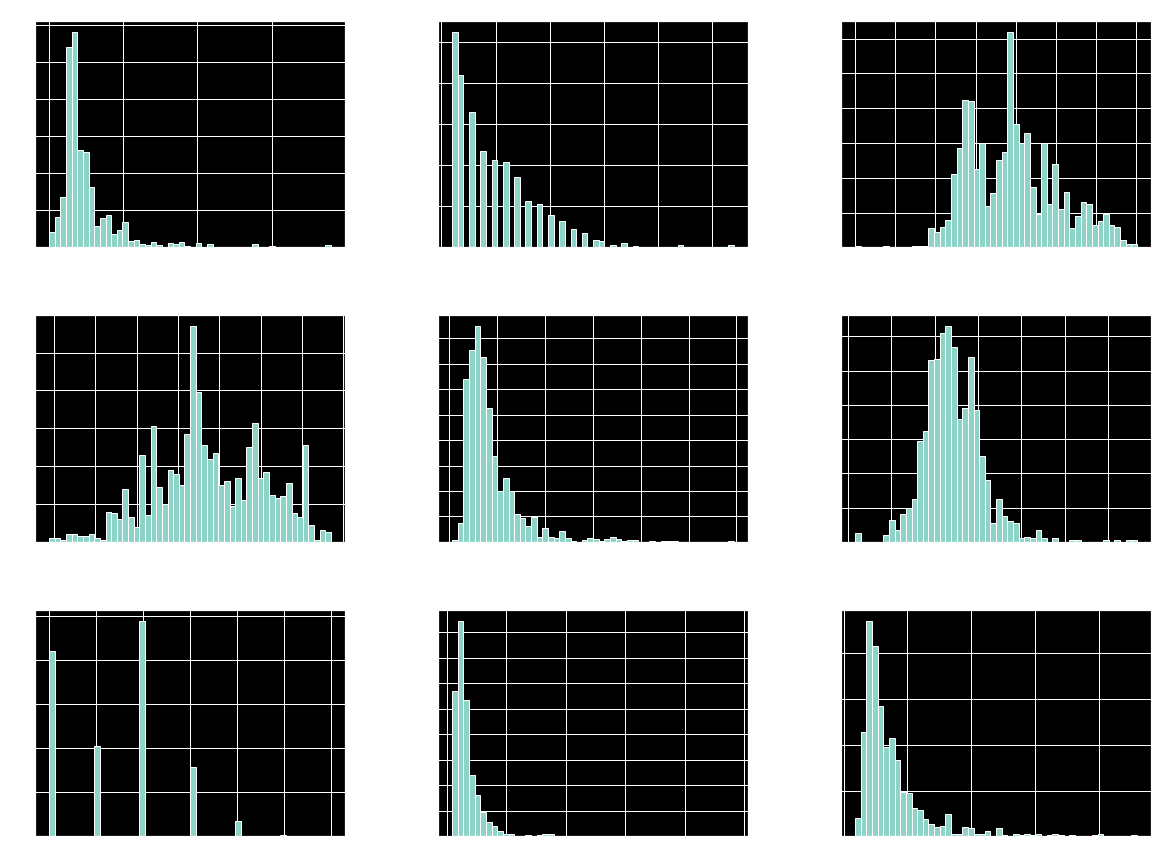

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
caba.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Some of the histograms are a little bit right skewed, but this is not abnormal.

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

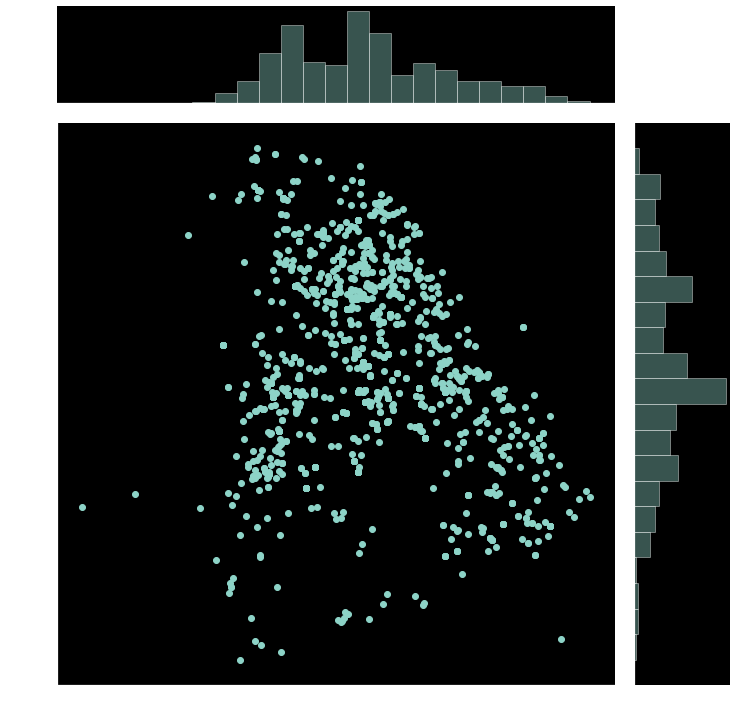

In [94]:
plt.figure(figsize=(12,12))
sns.jointplot(x=caba.lat.values, y=caba.lon.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Pareceria que hay mas datos en la parte norte y este de CABA.

<a id="section_corr"></a> 
## correlacion

[volver a TOC](#section_toc)

In [95]:
caba.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'floor', 'rooms', 'expenses', 'properati_url', 'description', 'title'],
      dtype='object')

In [96]:
sns.set_style("darkgrid")

<AxesSubplot:>

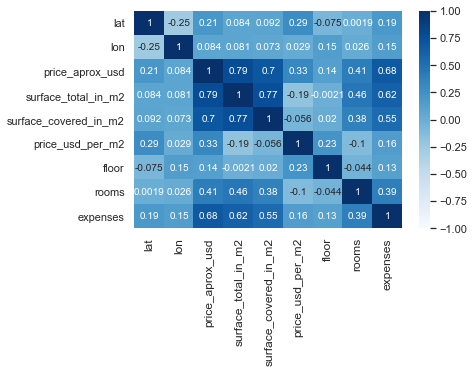

In [97]:
sns.heatmap(caba.corr(), annot=True, vmin=-1, cmap='Blues')

Vemos que la variable surface_total_in_m2 y surface_covered_in_m2 (0.77) tiene una alta correlacion, por lo que creamos una nueva variable surface_uncovered_in_m2.

In [98]:
corr_matrix = caba.corr()
corr_matrix["price_usd_per_m2"].sort_values(ascending=False)

price_usd_per_m2         1.000000
price_aprox_usd          0.329582
lat                      0.285581
floor                    0.227350
expenses                 0.161926
lon                      0.028949
surface_covered_in_m2   -0.056292
rooms                   -0.102339
surface_total_in_m2     -0.186680
Name: price_usd_per_m2, dtype: float64

Estas correlaciones y relaciones con la variable dependiente tienen sentido:
* A mayor latitud, es decir mas al norte de CABA, aumenta el precio.
* A mayor piso, aqui segurametne estamos apuntando a departamentos, aumenta el precio.
* Cuanto mas expensas, aumenta el preico.
* A mayor longitud, aunque poca, aumenta el precio.

Correlaciones negativas no claras:
* sup_covered
* rooms
* sup_total

In [99]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 351 to 119826
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          1308 non-null   object 
 1   place_name             1308 non-null   object 
 2   lat                    1308 non-null   float64
 3   lon                    1308 non-null   float64
 4   price_aprox_usd        1308 non-null   float64
 5   surface_total_in_m2    1308 non-null   float64
 6   surface_covered_in_m2  1308 non-null   float64
 7   price_usd_per_m2       1308 non-null   float64
 8   floor                  1308 non-null   float64
 9   rooms                  1308 non-null   float64
 10  expenses               1308 non-null   float64
 11  properati_url          1308 non-null   object 
 12  description            1308 non-null   object 
 13  title                  1308 non-null   object 
dtypes: float64(9), object(5)
memory usage: 153.3+ KB


In [100]:
caba.drop(caba.columns[[ 4]], axis=1, inplace=True)
caba.info()

IndexError: index 14 is out of bounds for axis 0 with size 14

<a id="section_uncovered"></a> 
## sup_uncovered

[volver a TOC](#section_toc)

In [ ]:
caba['surface_uncovered_in_m2'] = caba['surface_total_in_m2'] - caba['surface_covered_in_m2']

In [ ]:
caba.columns

In [ ]:
corr_matrix = caba.corr()
corr_matrix["price_usd_per_m2"].sort_values(ascending=False)

In [ ]:
attributes = ["price_usd_per_m2", "floor","expenses","surface_covered_in_m2", "surface_uncovered_in_m2"]
pd.plotting.scatter_matrix(caba[attributes], figsize=(12, 8))
#plt.savefig('matrix.png')

The most promising variable for predicting the usd price m2 is the surface total so let’s zoom in on their correlation scatter plot.

In [ ]:
caba.plot(kind="scatter", x="surface_total_in_m2", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

In [ ]:
caba.plot(kind="scatter", x="surface_covered_in_m2", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

In [ ]:
caba.plot(kind="scatter", x="surface_uncovered_in_m2", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

<a id="section_barrios"></a> 
## barrios

[volver a TOC](#section_toc)

In [ ]:
len(caba['place_name'].value_counts())

In [ ]:
c = caba.groupby('place_name').count()['price_usd_per_m2']
c.sort_values(axis=0, ascending=False)

In [ ]:
a = caba.groupby('place_name').mean()['price_usd_per_m2']
a.sort_values(axis=0, ascending=False)

In [ ]:
b = caba.groupby('place_name').median()['price_usd_per_m2']
b.sort_values(axis=0, ascending=False)

Podemos ver que la variable dependiente tiene coherencia respecto a los distintos barrios.

In [ ]:
#caba.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

Agrupamiento de barrios

In [ ]:
freq = caba.groupby('place_name').count()['properati_url']
mean = caba.groupby('place_name').mean()['price_usd_per_m2']
cluster = pd.concat([freq, mean], axis=1)
cluster['place_name'] = cluster.index
cluster.columns = ['freq', 'price_usd_per_m2','place_name']
cluster.describe()

In [ ]:
cluster1 = cluster[cluster.price_usd_per_m2 < 2179] #low price neighborhoods:
cluster1.index

In [ ]:
cluster_temp = cluster[cluster.price_usd_per_m2 >= 2180]#high price and low frequency neighborhoods
cluster2 = cluster_temp[cluster_temp.freq <10]
cluster2.index

In [ ]:
cluster3 = cluster_temp[cluster_temp.freq >=10] #high price and high frequency neighborhoods
cluster3.index

In [ ]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
    

In [ ]:
caba['group'] = caba.place_name.apply(get_group)

create dummy variables for these two categorical variables: 

In [ ]:
caba.info()

<a id="section_property"></a> 
## property type

[volver a TOC](#section_toc)

In [ ]:
X = caba[['property_type', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'surface_uncovered_in_m2', 'group']]
Y = caba['price_usd_per_m2']

n = pd.get_dummies(caba.group)
X = pd.concat([X, n], axis=1)
m = pd.get_dummies(caba.property_type)
X = pd.concat([X, m], axis=1)
drops = ['group', 'property_type']
X.drop(drops, inplace=True, axis=1)
X.head()

https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878

<a id="section_pileta"></a> 
## Pileta y Cochera

[volver a TOC](#section_toc)

<a id="section_externa"></a> 
## subte / bus / train

[volver a TOC](#section_toc)

<a id="section_regres"></a> 
## regresiones

[volver a TOC](#section_toc)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [ ]:
#Primer modelo simple

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)
lm = LinearRegression()
model_1 = cross_val_score (lm,X_train,y_train, cv=5, scoring='r2')
#y_pred = model_1.predict(X_test) # or should be X_train


print("r^2_mean: ",round(model_1.mean(),2))
print('r^2 CV models:',model_1)

In [ ]:
#Segundo modelo usando Ridge y Cross Validation
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                      normalize=True, cv=5, scoring='r2')

# best_score_

model_2 = lm_ridge.fit(X_train, y_train)

y_pred = model_2.predict(X_test) # or should be X_train

model2_r2 = cross_val_score (lm_ridge,X_train,y_train, cv=5, scoring='r2')

print("r^2_mean: ",round(model2_r2.mean(),2))

#AL FINAL 
print('r^2  model_2 Ridge train:', round(model_2.score(X_train, y_train),2))
print('r^2 model_2 Ridge test:', round(model_2.score(X_test, y_test),2))


In [ ]:
#Tercer modelo usando Lasso y Cross Validation
lm_lasso = linear_model.LassoCV(alphas=np.linspace(0.0001,100,1000),\
                                        normalize=True, cv=5)
model_3 = lm_lasso.fit(X_train, y_train)
#y_pred = model_3.predict(X_test)
print('r^2  model_3 Lasso train:', round(model_3.score(X_train, y_train),2))
print('r^2  model_3 Lasso test:', round(model_3.score(X_test, y_test),2))

In [ ]:
#Quinto modelo usando elastic net
lm_elasticnet = linear_model.ElasticNet(alpha=0.00001, normalize=True)
model_4 = lm_elasticnet.fit(X_train, y_train)
#y_pred = model_5.predict(X_test)
print('r^2  model_4 Elastic Net train:', round(model_4.score(X_train, y_train),2))
print('r^2  model_4 Elastic Net test:', round(model_4.score(X_test, y_test),2))

Falta agregar las dummies de subte y cochera/pileta/exterior